# Assignment 4
#### Alan Kessler, Predict 410 Section 57

This notebook contains the code accompanying the report. The original code and instructions for the assignment were set up as a tutorial. As I made modifications to that, I just created a new notebook. The code is a mix of my own the code provided for the assignment.

The topic of the assignment is k-means clustering.

In [1]:
import pandas as pd     
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs

pd.set_option('display.max_columns', None)

## Load Data

In [2]:
# Self-rated personality attributes where 9 indicates "very much like me"
# Source: http://www.stanford.edu/class/psych253/data/personality0.txt
student_data = pd.read_csv('student_data.csv')
student_data.head()

,distant,talkative,careless,hardworking,anxious,agreeable,tense,kind,opposing,relaxed,disorganized,outgoing,approving,shy,disciplined,harsh,persevering,friendly,worrying,responsive,contrary,sociable,lazy,cooperative,quiet,organized,critical,lax,laidback,withdrawn,givingup,easygoing
0,2,7,1,4,7,8,5,9,5,6,3,2,7,9,5,5,8,9,9,9,5,9,7,9,9,5,5,5,7,5,5,8
1,3,8,2,7,5,8,4,8,5,7,5,8,7,6,7,3,7,7,5,7,5,8,2,7,6,6,4,3,7,2,2,7
2,6,6,2,5,1,8,2,9,2,8,7,6,7,5,5,2,5,8,3,9,2,8,5,8,7,4,5,5,7,6,2,8
3,3,7,6,7,8,8,2,8,3,7,2,5,6,4,6,2,8,8,3,8,2,6,3,8,4,7,6,6,6,4,3,7
4,7,3,3,5,8,6,7,2,3,3,5,2,5,8,7,5,6,2,8,7,3,2,6,6,7,5,5,3,3,7,5,5


In [3]:
student_data.describe()

,distant,talkative,careless,hardworking,anxious,agreeable,tense,kind,opposing,relaxed,disorganized,outgoing,approving,shy,disciplined,harsh,persevering,friendly,worrying,responsive,contrary,sociable,lazy,cooperative,quiet,organized,critical,lax,laidback,withdrawn,givingup,easygoing
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,3.866667,5.883333,3.412500,6.925000,5.129167,6.629167,4.616667,6.970833,3.858333,5.475000,4.083333,6.020833,5.858333,4.558333,6.308333,3.600000,6.804167,7.250000,5.212500,7.291667,3.770833,6.445833,4.179167,6.695833,4.604167,6.154167,5.170833,4.083333,5.245833,3.754167,2.675000,6.066667
std,1.794615,1.677732,1.811357,1.370108,1.880305,1.372162,1.904337,1.262255,1.599141,1.694009,2.126082,1.809894,1.367867,1.969626,1.725011,1.683789,1.405006,1.155304,2.108126,1.395725,1.500900,1.567579,1.893941,1.197619,1.880750,1.963363,1.745282,1.664713,1.790837,1.769684,1.553307,1.601429
min,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,5.000000,2.000000,6.000000,4.000000,6.000000,3.000000,6.000000,3.000000,4.000000,2.000000,5.000000,5.000000,3.000000,5.000000,2.000000,6.000000,7.000000,3.000000,7.000000,3.000000,5.000000,3.000000,6.000000,3.000000,5.000000,4.000000,3.000000,4.000000,2.000000,1.750000,5.000000
50%,3.000000,6.000000,3.000000,7.000000,5.000000,7.000000,5.000000,7.000000,4.000000,5.000000,4.000000,6.000000,6.000000,5.000000,7.000000,3.000000,7.000000,7.000000,6.000000,8.000000,4.000000,7.000000,4.000000,7.000000,5.000000,6.000000,5.000000,4.000000,5.000000,3.000000,2.000000,6.000000
75%,5.000000,7.000000,5.000000,8.000000,7.000000,8.000000,6.000000,8.000000,5.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,5.000000,8.000000,8.000000,7.000000,8.000000,5.000000,8.000000,5.000000,7.000000,6.000000,8.000000,6.000000,5.000000,7.000000,5.000000,4.000000,7.000000
max,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,7.000000,8.000000,9.000000


## K-Means Clustering of Variables

In [4]:
# Standardize prior to clustering
standardized_student_data_matrix = preprocessing.scale(student_data)

# Transpose of matrix needed for clusters of variables
variable_cluster_data = student_data.T

# Assignment suggests that five factors of personalities correspond to clusters
kmeans = KMeans(n_clusters=5, n_init=25, random_state=1)
kmeans.fit(variable_cluster_data)

kmeans_preds = variable_cluster_data.copy()
kmeans_preds['cluster'] = kmeans.predict(variable_cluster_data)

# Print results of variable clustering one cluster at a time
for cluster_id in sorted(kmeans_preds['cluster'].unique()):
    print()
    print(kmeans_preds[['cluster']][kmeans_preds['cluster'] == cluster_id])


           cluster
relaxed          0
laidback         0
easygoing        0

              cluster
distant             1
careless            1
opposing            1
disorganized        1
harsh               1
contrary            1
lazy                1
lax                 1
withdrawn           1
givingup            1

           cluster
talkative        2
outgoing         2
approving        2
sociable         2

          cluster
anxious         3
tense           3
shy             3
worrying        3
quiet           3
critical        3

             cluster
hardworking        4
agreeable          4
kind               4
disciplined        4
persevering        4
friendly           4
responsive         4
cooperative        4
organized          4


## Silhouette Coefficient

From the assignment: The silhouette coefficient is a useful general-purpose index for evaluating the strength of a clustering solution. The original reference is:

Peter J. Rousseeuw (1987). “Silhouettes: a Graphical Aid to the 
     Interpretation and Validation of Cluster Analysis”. 
     Computational and Applied Mathematics 20: 53–65. 
     doi:10.1016/0377-0427(87)90125-7.

Larger positive values of the silhouette coefficient are preferred these indicate dense, well separated clusters.

This [example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) is a good reference.

In [5]:
# Evaluate the clustering solution using the silhouette coefficient
s_score = metrics.silhouette_score(variable_cluster_data,
                                   kmeans_preds['cluster'],
                                   metric='euclidean')

print("Silhouette coefficient for n=5 k-means: {:0.4f}".format(s_score))

Silhouette coefficient for n=5 k-means: 0.1764


## K-Means Clustering of Students

The assignment discusses clustering individuals for potential marketing applications.

In [6]:
# Calculate the silhouette coefficient for each n number of clusters
scores = []
clusters = range(2, 21)
for nclusters in clusters:
    kmeans = KMeans(n_clusters=nclusters, n_init=25, random_state=1)
    kmeans.fit(standardized_student_data_matrix)
    segment = kmeans.predict(standardized_student_data_matrix)
    s_score = metrics.silhouette_score(standardized_student_data_matrix,
                                       segment,
                                       metric='euclidean')
    scores.append(s_score)
    print("clusters: {:d} silhouette coefficient: {:0.4f}".format(nclusters,
                                                                  s_score))

clusters: 2 silhouette coefficient: 0.1328
clusters: 3 silhouette coefficient: 0.1017
clusters: 4 silhouette coefficient: 0.0941
clusters: 5 silhouette coefficient: 0.0850
clusters: 6 silhouette coefficient: 0.0761
clusters: 7 silhouette coefficient: 0.0669
clusters: 8 silhouette coefficient: 0.0696
clusters: 9 silhouette coefficient: 0.0759
clusters: 10 silhouette coefficient: 0.0636
clusters: 11 silhouette coefficient: 0.0588
clusters: 12 silhouette coefficient: 0.0636
clusters: 13 silhouette coefficient: 0.0553
clusters: 14 silhouette coefficient: 0.0550
clusters: 15 silhouette coefficient: 0.0582
clusters: 16 silhouette coefficient: 0.0522
clusters: 17 silhouette coefficient: 0.0540
clusters: 18 silhouette coefficient: 0.0578
clusters: 19 silhouette coefficient: 0.0521
clusters: 20 silhouette coefficient: 0.0470


Based on the score alone, the two-cluster solution is selected in the assignment tutorial.

## Cluster Interpretation

In [7]:
kmeans = KMeans(n_clusters=2, n_init=25, random_state=1)
kmeans.fit(standardized_student_data_matrix)

kmeans_preds = student_data.copy()
kmeans_preds['cluster'] = kmeans.predict(standardized_student_data_matrix)

# Compare variable means by Cluster
grouped = kmeans_preds.groupby('cluster').agg([np.mean])
grouped.columns = grouped.columns.droplevel(1)
grouped = grouped.transpose()
grouped.index.names = ['Variable Mean']
grouped.columns = ['Cluster 0', 'Cluster 1']
grouped['Difference'] = grouped['Cluster 0'] - grouped['Cluster 1']
grouped['abs diff'] = np.abs(grouped['Difference'])
grouped.sort_values(by=['abs diff'], inplace=True, ascending=False)
grouped.drop(['abs diff'], axis=1, inplace=True)
grouped.style.format({
    'Cluster 0': '{:,.2f}'.format,
    'Cluster 1': '{:,.2f}'.format,
    'Difference': '{:,.2f}'.format
})

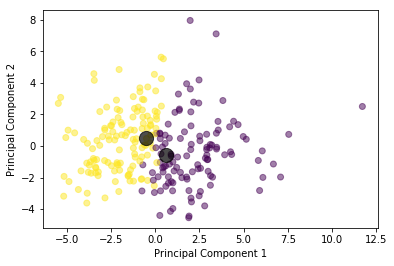

In [8]:
# Visualize cluster assignments with PCA
pca = PCA()
P = pca.fit(standardized_student_data_matrix)
C = pca.transform(standardized_student_data_matrix)
for i in range(0, 2):
    name = "pca" + str(1 + i)
    kmeans_preds[name] = C[:, i]

centers = kmeans.cluster_centers_
plt.scatter(kmeans_preds['pca1'], kmeans_preds['pca2'],
            c=kmeans_preds['cluster'], alpha=0.5, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Interpretation example using generated data as well.

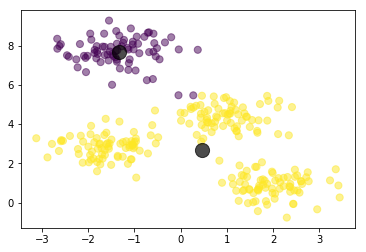

In [9]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=.60, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7)
plt.show()